# Ćwiczenie 3. 
Celem ćwiczenia jest obserwacja widma sygnału EKG.
1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.
3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w
punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ecg100
(można wyznaczyć różnicę sygnałów).

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
file_name = "./src/"+input("Podaj nazwe pliku z danymi: ")
data_frame = pd.read_csv(file_name,sep="\\s+",header=None,engine="python")


### Zadanie nr1
Wczytano plik ekg100.txt zgodnie z treścią ćwiczenia.\
W celu oceny wizualnej wykorzystano bibliotekę matplotlib w celu wizualizacji funkcji wynikajacej z treści pliku tekstowego.

In [22]:
#Wykres EKG (Na podstawie pobranych danych) w zakresie start : end
def displayEKG(start,end):
    data_frame.columns = ['data']
    new_data = data_frame.iloc[ start :end ].copy()
    plt.figure(figsize=(20,5))
    plt.plot(new_data['data']) #rysowanie wykresu
    plt.grid(True)
    plt.title("EKG")
    plt.show()


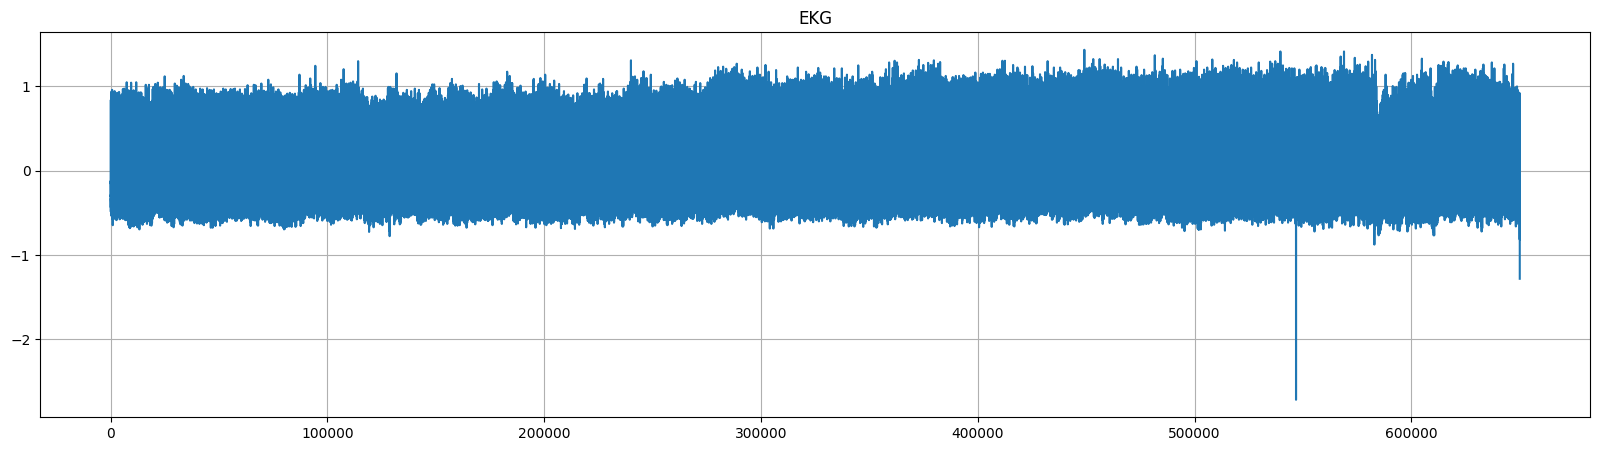

In [23]:
displayEKG(0,len(data_frame))

Przy próbie wyświetlenia całego sygnału widać że jest on mało czytelny. Można więc ograniczyć wyświetlany sygnał do 1000 próbek

In [24]:
displayEKG(0,1000)

Po ograniczeniu zakresu widać że pobrany sygnał wyświetla się poprawnie i jest czytelny.

### Zadanie nr2

Wyznaczono transformantę Fouriera korzystając z biblioteki numpy oraz funkcji fft.
Na podstawie transformanty przedstawiono widmo amplitudowe w funkcji częstotliwości.

Korzystając z zewnętrznych źródeł wykonano dodatkowe kroki w celu prawidłowego wyznaczenia widma amplitudowego:
- Wyprowadzono amplitudę transformanty Fouriera,
- Znormalizowano zakres amplitudy aby maksymalną wartością było 1,
- Wygenerowało prawidłowe częstotliwości dla zadanego zakresu,
- Wyznaczono widmo w dodatnim zakresie częstotliwości,


In [25]:
#Generacja i wyświetlenie widma sygnału
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data']) #transformata fouriera

#dodatkowe kroki
widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2] #częstotliwości w zakresie [0,fs/2]
pos_widmo = abs_widmo[:len(abs_widmo)//2] #widmo amplitudowe (część dodatnia)
#koniec dodatkowych kroków

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()


Wyznaczono odwrotną tranformantę Fouriera oraz porównano otrzymany ciąg z pierwotnym sygnałem.

Wyznaczoną różnicę zaznaczono pomarańczową linią przerywaną.

In [29]:
#Wizualizacja różnicy odwrotnej transformaty(Utworzonej na podstawie widma) i sygnału
def displayFourier(start,end):
    inv_fourier = np.fft.ifft(fourier1).real
    inv_fourier = data_frame['data'] - inv_fourier
    inv_fourier = inv_fourier.values[start:end]
    plt.figure(figsize=(20,5))
    plt.plot(data_frame['data'][start:end], label="Oryginalny sygnał")
    plt.plot(inv_fourier, linestyle="dashed", alpha=0.7, label="Różnica między oryginałem a odzyskanym sygnałem")
    plt.grid(True)
    plt.legend()
    plt.title("EKG")
    plt.show()


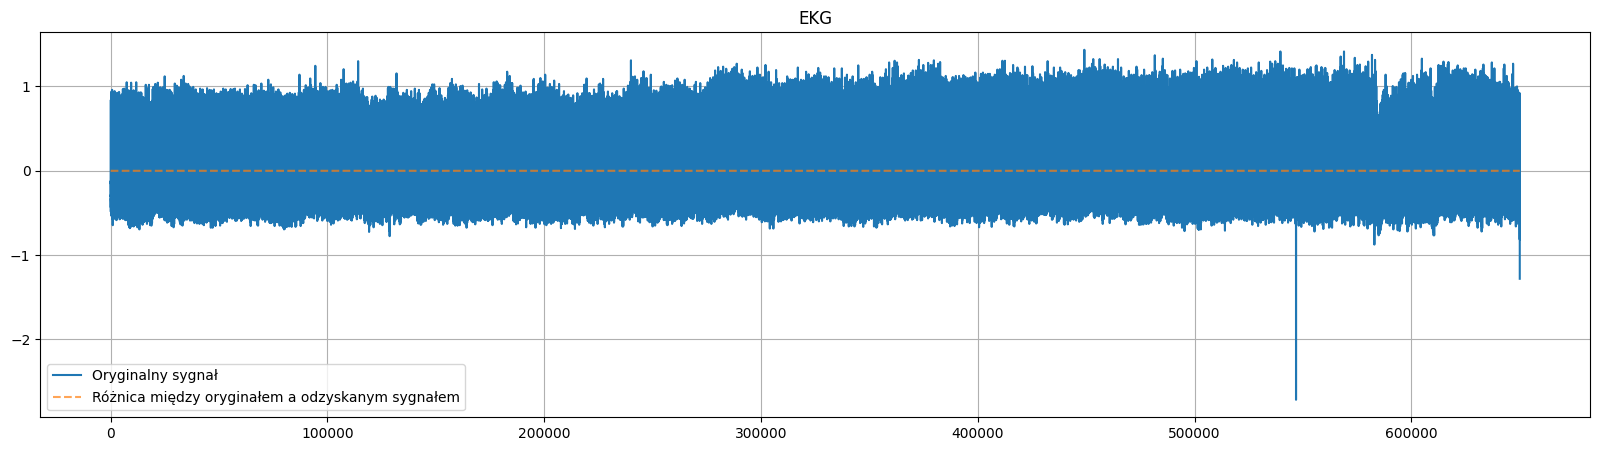

In [27]:
displayFourier(0,len(data_frame))

Podobnie jak w poprzednim wypadku cały sygnał jest nie czytelny więc ograniczamy go do 1000 próbek.

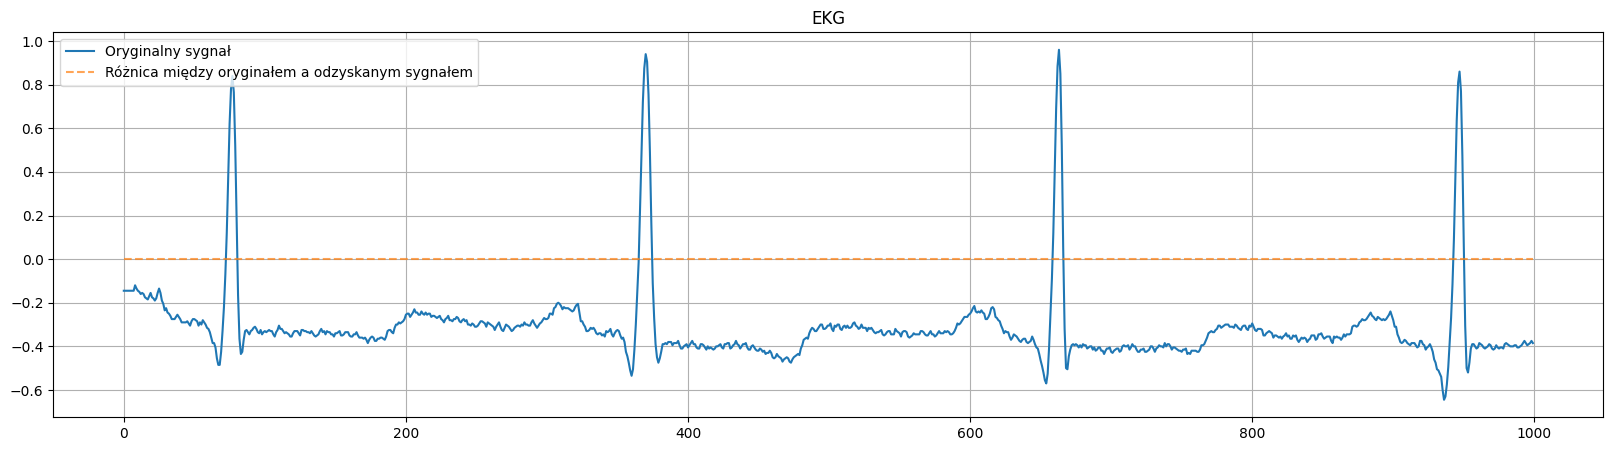

In [30]:
displayFourier(0,1000)

Można łatwo zauważyć że różnica sygnałów nieistnieje lub jest bardzo znikoma i wręcz nieodczytywalna.